In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn",path = "WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Therefore there are no null values in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now as we can see, there are a lot of object Dtypes which is not preffered. and many of the object type values are yes or no so we will convert to 0 and 1 for further use.

In [8]:
df = df.replace(['No','No phone service','No internet service'],0)
df = df.replace('Yes',1)

C:\Users\Bhavik Sheth\AppData\Local\Temp\ipykernel_13000\2591811252.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Yes',1)


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Now dropping the customer id as it is not essential for training the model

In [10]:
df = df.drop('customerID', axis = 1)

In [11]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1
7042,Male,0,0,0,66,1,0,Fiber optic,1,0,1,1,1,1,Two year,1,Bank transfer (automatic),105.65,6844.5,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


Since, total charges has numerical values, lets convert them into actual floats instead of the current representation

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',None)


In [14]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Dropping the 11 null values.

In [15]:
df = df.dropna()


In [16]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

Checking how many unique values are there in a column

In [17]:
all_cols = df.columns

In [18]:
c = list(df.select_dtypes(exclude='number').columns)
print(c)

['gender', 'InternetService', 'Contract', 'PaymentMethod']


In [19]:
for col in c:
  print(f"No of unique values in {col} = {df[col].unique()}")

No of unique values in gender = ['Female' 'Male']
No of unique values in InternetService = ['DSL' 'Fiber optic' 0]
No of unique values in Contract = ['Month-to-month' 'One year' 'Two year']
No of unique values in PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
encoded_df = pd.get_dummies(df, columns=c, drop_first=True, dtype=int)

In [21]:
encoded_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,1,1,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,1,1,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,0,0,1,0,0,0,1,0


In [22]:
encoded_df.shape

(7032, 24)

In [23]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   MultipleLines                          7032 non-null   int64  
 6   OnlineSecurity                         7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Streaming

Now the data is totally in numerical type and can be used in the further steps

In [24]:
unique_cols = []
for col in df.columns:

    # Get the unique values in this specific column
    unique_vals = df[col].unique()

    # Check if the unique values are a subset of [0, 1]
    # set(unique_vals) <= {0, 1} checks if the values are ONLY inside {0, 1}
    if set(unique_vals).issubset({0, 1}):
        unique_cols.append(col)
print(unique_cols)

['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


## Visualization

In [25]:
cols = encoded_df.columns
print(cols)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


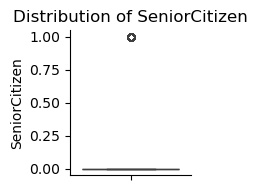

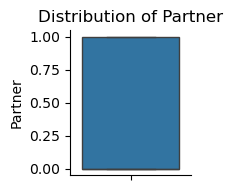

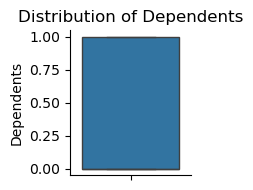

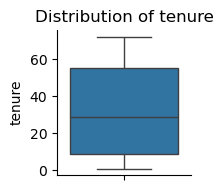

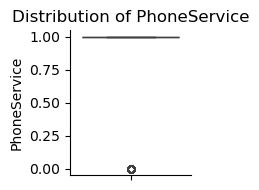

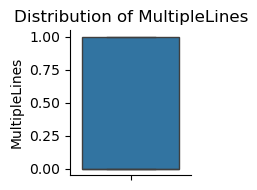

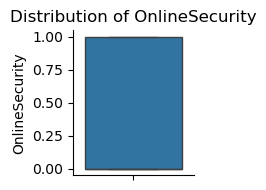

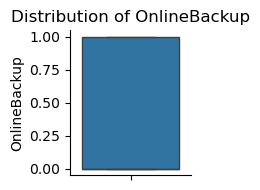

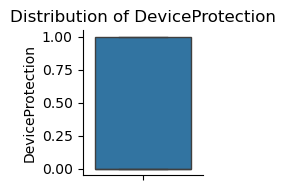

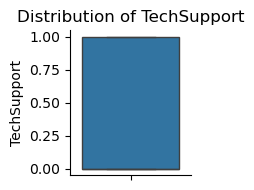

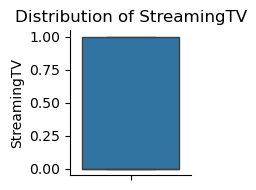

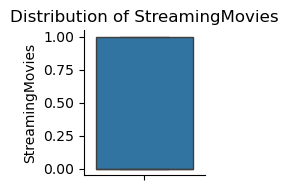

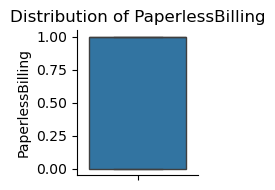

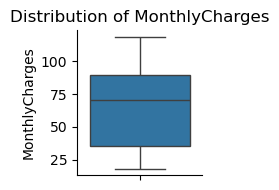

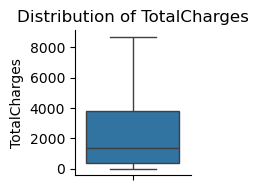

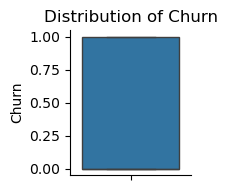

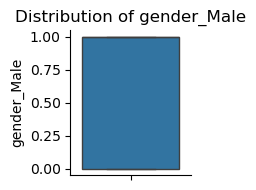

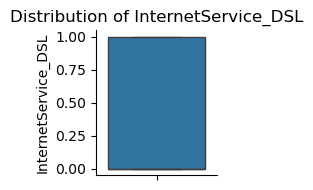

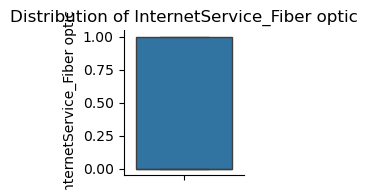

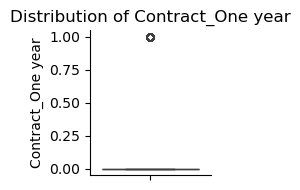

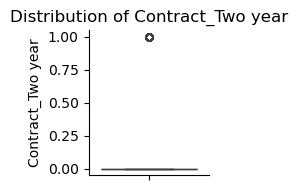

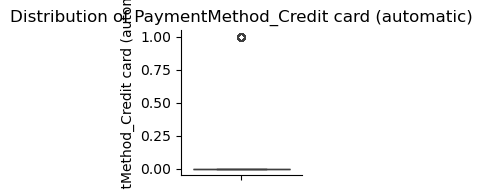

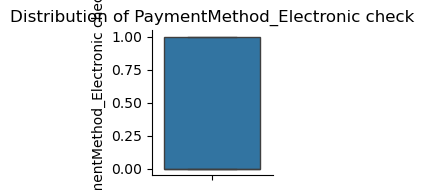

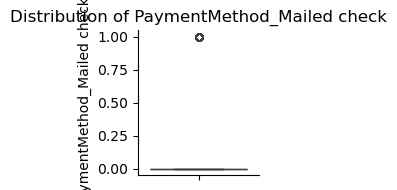

In [26]:


for col in cols:
  # plt.figure(figsize = (3,3))
  sns.catplot(encoded_df,y = encoded_df[col], kind = 'box',height = 2, aspect = 1)
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.show()

From this, we see that many columns have outliers that can be bad for our mode. Now we will remove them

In [27]:
def remove_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [28]:
# for col in cols:
#   encoded_df = remove_outliers(encoded_df,col)

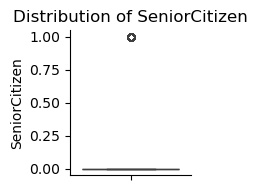

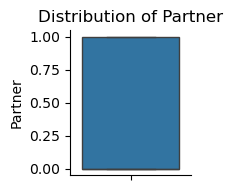

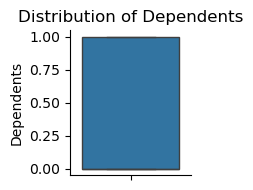

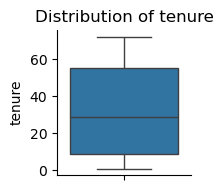

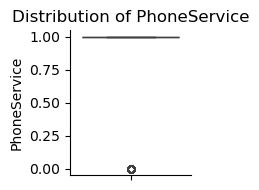

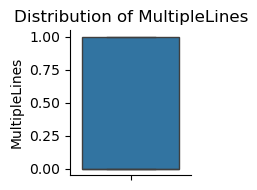

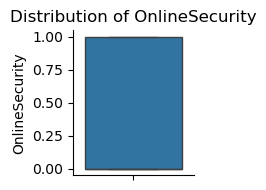

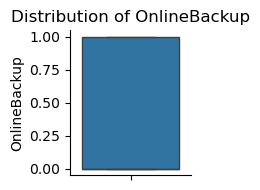

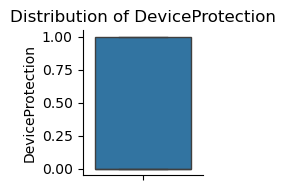

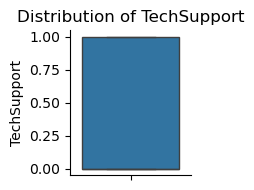

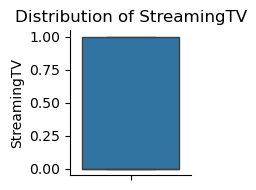

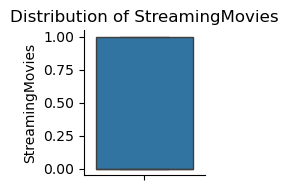

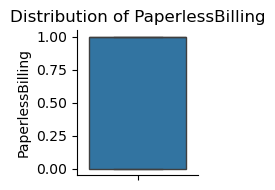

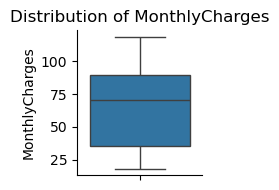

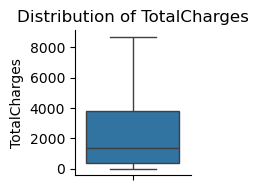

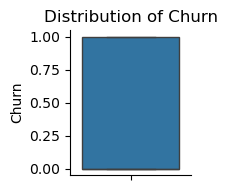

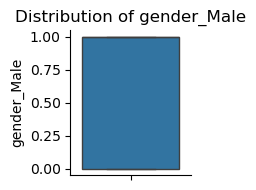

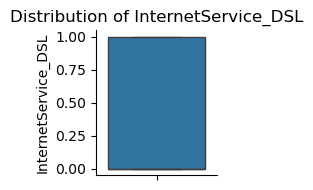

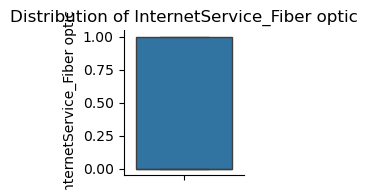

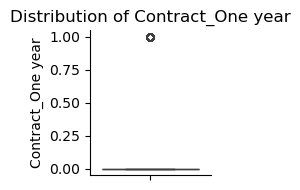

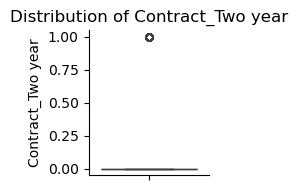

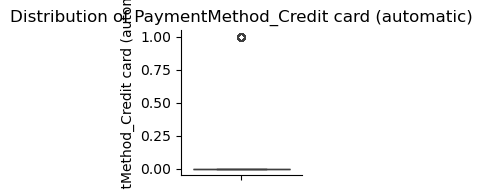

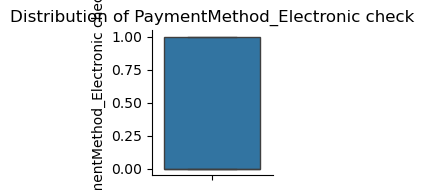

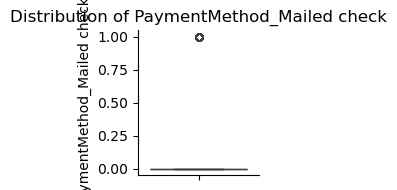

In [29]:
for col in cols:
  # plt.figure(figsize = (3,3))
  sns.catplot(encoded_df,y = encoded_df[col], kind = 'box',height = 2, aspect = 1)
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.show()

Now we have no outliers.

In [30]:
col_name = encoded_df.drop('Churn',axis = 1).columns
col_name

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'gender_Male', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Training the model

In [31]:
target = pd.DataFrame(encoded_df['Churn'])
features = encoded_df.drop('Churn',axis = 1)


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [33]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(
    penalty='l2',
    n_jobs = -1,
    warm_start=True
)

logistic.fit(x_train, y_train)

c:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(n_jobs=-1, warm_start=True)

In [34]:
y_pred = logistic.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score of the Logistic Regression Model = {score}")

Accuracy score of the Logistic Regression Model = 0.7846481876332623


In [36]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_jobs = -1, random_state = 42, n_estimators = 2000, criterion = 'gini',oob_score=True,ccp_alpha=0.001,max_features = "log2", max_leaf_nodes = 30)

forest.fit(x_train,y_train)


c:\Anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(ccp_alpha=0.001, max_features='log2', max_leaf_nodes=30,
                       n_estimators=2000, n_jobs=-1, oob_score=True,
                       random_state=42)

In [37]:

y_pred_forest = forest.predict(x_test)

score_forest = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy score of the Random Forest Model = {score_forest}")

Accuracy score of the Random Forest Model = 0.7903340440653873


In [ ]:
# %pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.6/72.0 MB 8.5 MB/s eta 0:00:09
   - -------------------------------------- 3.4/72.0 MB 9.1 MB/s eta 0:00:08
   -- ------------------------------------- 4.7/72.0 MB 8.6 MB/s eta 0:00:08
   -- ------------------------------------- 5.2/72.0 MB 6.9 MB/s eta 0:00:10
   --- ------------------------------------ 6.6/72.0 MB 6.5 MB/s eta 0:00:11
   ---- ----------------------------------- 7.6/72.0 MB 6.3 MB/s eta 0:00:11
   ---- ----------------------------------- 8.1/72.0 MB 5.7 MB/s eta 0:00:12
   ---- ----------------------------------- 8.9/72.0 MB 5.4 MB/s eta 0:00:12
   ----- ---------------------------------- 9.7/72.0 MB 5.3 MB/s eta 0:00:12
   ----- ---------------------------------- 10.5/72.0 MB 5.1 MB/s eta 0:00:12
   ------ --------------------------------- 11.3/72.0 MB 5.0 MB/s eta 0:00:13
   ------ --------------------------------- 12.1/72.0 MB 5.1 MB/s eta 0:00:12
   

In [41]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_jobs = -1, random_state = 42, n_estimators= 200, oob_score = True, max_depth = 2, gamma = 0.001, learning_rate = 0.3)

xgbc.fit(x_train,y_train)

c:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:39:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "oob_score" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.001, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=None, ...)

In [42]:
xgbc_pred = xgbc.predict(x_test)

xgbc_score = accuracy_score(y_test, xgbc_pred)

print(f"Accuracy score of the XGB Classifier Model = {xgbc_score}")

Accuracy score of the XGB Classifier Model = 0.7945984363894811


--- Random Forest Evaluation Report ---
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.67      0.41      0.51       374

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.78      0.79      0.77      1407



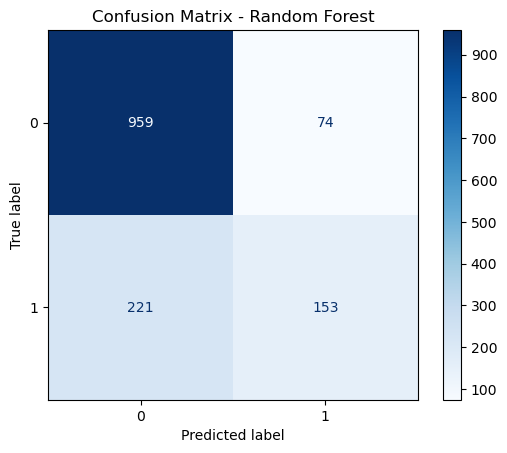

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate a detailed report
print("--- Random Forest Evaluation Report ---")
print(classification_report(y_test, y_pred_forest))

# Visualizing the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.savefig('confusion_matrix.png') # Saving as per plan
plt.show()

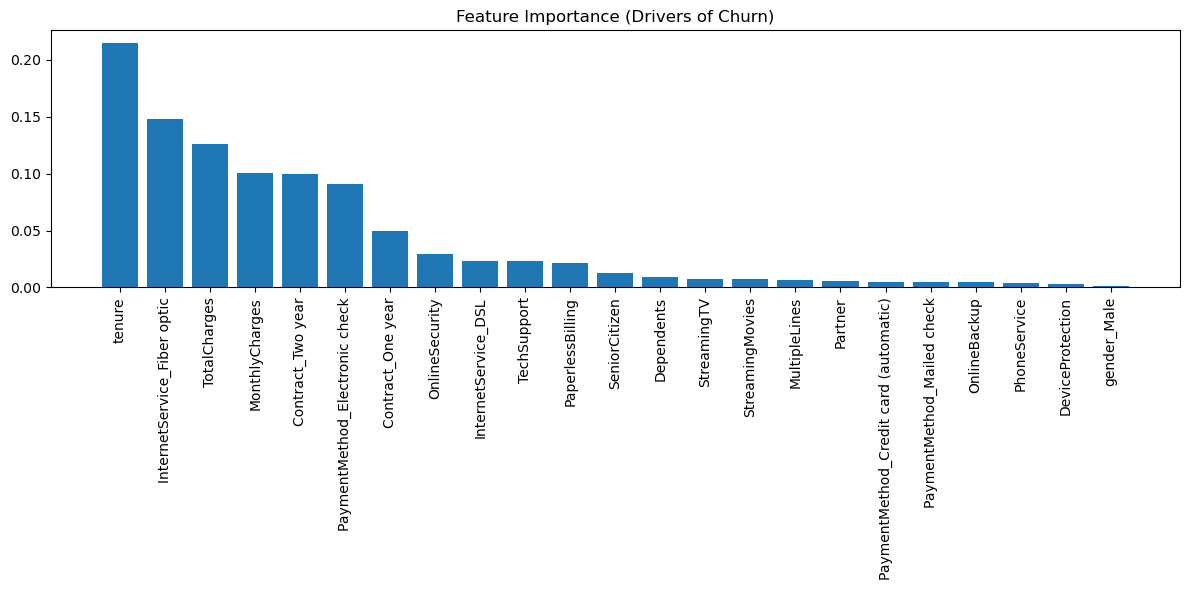

In [44]:
import numpy as np

# Get feature importances
importances = forest.feature_importances_
feature_names = x_train.columns

# Sort them for better visualization
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance (Drivers of Churn)")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
# Only plot top 20 features for readability if there are many
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.savefig('feature_importance.png') # Saving as per plan
plt.show()

In [45]:
# Get probabilities for the positive class (Churn = 1)
y_probs = forest.predict_proba(x_test)[:, 1]

# Create a summary DataFrame
results_df = pd.DataFrame({
    'Actual_Churn': y_test.iloc[:,0].values,
    'Predicted_Class': y_pred_forest,
    'Churn_Probability': y_probs
})

# Display high-risk customers
print(results_df.head(10))

# Export predictions
results_df.to_csv('churn_predictions.csv', index=False)

   Actual_Churn  Predicted_Class  Churn_Probability
0             0                0           0.052389
1             0                0           0.106426
2             1                1           0.528577
3             0                0           0.116490
4             0                0           0.287532
5             0                0           0.368225
6             0                0           0.165764
7             0                1           0.626578
8             0                0           0.137356
9             0                0           0.082246


In [46]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create a PDF object
with PdfPages('Churn_Analysis_Report.pdf') as pdf:
    
    # Page 1: Title & Metrics
    plt.figure(figsize=(8.5, 11))
    plt.axis('off')
    plt.text(0.5, 0.9, "Customer Churn Analysis Report", ha='center', fontsize=24, fontweight='bold')
    plt.text(0.1, 0.8, f"Random Forest Accuracy: {score_forest:.2%}", fontsize=14)
    plt.text(0.1, 0.75, "Key Insight: See subsequent pages for drivers and confusion matrix.", fontsize=12)
    pdf.savefig()
    plt.close()

    # Page 2: Feature Importance (Re-plotting for PDF)
    plt.figure(figsize=(10, 6))
    indices = np.argsort(importances)[::-1]
    plt.title("Top Churn Drivers (Feature Importance)")
    # Ensure we don't go out of bounds if there are fewer than 20 features
    top_n = min(20, len(importances))
    plt.bar(range(top_n), importances[indices][:top_n], align="center") 
    plt.xticks(range(top_n), feature_names[indices][:top_n], rotation=90)
    plt.tight_layout()
    pdf.savefig()  # Save the current figure
    plt.close()

    # Page 3: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_forest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
    disp.plot(cmap='Blues')
    plt.title("Model Confusion Matrix")
    pdf.savefig()
    plt.close()

print("PDF Report generated: Churn_Analysis_Report.pdf")

PDF Report generated: Churn_Analysis_Report.pdf
